## Investigate Source Datasets

In [1]:
# import main libraries
import datetime
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from collections import Counter
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
# load and read our dataset for initial exploration - from data.world (source for Tableau dashboard)
df = pd.read_csv('https://query.data.world/s/cg3texvvmoyagywal62azempdhhyu4')

# preview our data
df.head(5)

,Table Names,Case_Type,Cases,Difference,Date,Country_Region,Province_State,Admin2,FIPS,Combined_Key,Lat,Long,Prep_Flow_Runtime,Latest_Date
0,JHU Daily,Deaths,0,0,3/25/2020,US,Virgin Islands,NaN,78000.0,"Virgin Islands, US",18.3358,-64.8963,3/26/2020 7:50:18 AM,3/25/2020
1,JHU Daily,Confirmed,17,0,3/25/2020,US,Virgin Islands,NaN,78000.0,"Virgin Islands, US",18.3358,-64.8963,3/26/2020 7:50:18 AM,3/25/2020
2,JHU Daily,Deaths,2,0,3/25/2020,US,Puerto Rico,NaN,NaN,"Puerto Rico, US",18.2208,-66.5901,3/26/2020 7:50:18 AM,3/25/2020
3,JHU Daily,Confirmed,51,0,3/25/2020,US,Puerto Rico,NaN,NaN,"Puerto Rico, US",18.2208,-66.5901,3/26/2020 7:50:18 AM,3/25/2020
4,JHU Daily,Deaths,1,0,3/25/2020,US,Guam,NaN,66000.0,"Guam, US",13.4443,144.7937,3/26/2020 7:50:18 AM,3/25/2020


In [3]:
# compare to alternate dataset - from ecdc
date = datetime.datetime.now()
COVID_19_URL = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-"
df2=pd.read_excel(COVID_19_URL + date.strftime("%Y-%m-%d")+ ".xlsx", sep = "")

# preview  data
df2.head(5)

,DateRep,Day,Month,Year,Cases,Deaths,Countries and territories,GeoId,Country Code,Pop_Data.2018
0,2020-03-26,26,3,2020,33,0,Afghanistan,AF,AFG,37172386.0
1,2020-03-25,25,3,2020,2,0,Afghanistan,AF,AFG,37172386.0
2,2020-03-24,24,3,2020,6,1,Afghanistan,AF,AFG,37172386.0
3,2020-03-23,23,3,2020,10,0,Afghanistan,AF,AFG,37172386.0
4,2020-03-22,22,3,2020,0,0,Afghanistan,AF,AFG,37172386.0


In [4]:
# compare to direct link to John Hopkins timeset data
data = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
df3 = pd.read_csv(data, sep=",")

# preview our data
df3.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,2
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1,1,2,2,2,2,2,4,5,5
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,4,4,7,9,11,15,17,17,19,21
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Investigate selected Dataset

#### Using EDCD data - because it's the most updated - the others have a one day lag

In [5]:
# making copy and renaming master file
covid = df2.copy()
covid.head(5)

,DateRep,Day,Month,Year,Cases,Deaths,Countries and territories,GeoId,Country Code,Pop_Data.2018
0,2020-03-26,26,3,2020,33,0,Afghanistan,AF,AFG,37172386.0
1,2020-03-25,25,3,2020,2,0,Afghanistan,AF,AFG,37172386.0
2,2020-03-24,24,3,2020,6,1,Afghanistan,AF,AFG,37172386.0
3,2020-03-23,23,3,2020,10,0,Afghanistan,AF,AFG,37172386.0
4,2020-03-22,22,3,2020,0,0,Afghanistan,AF,AFG,37172386.0


In [6]:
# sanity check
covid.shape

(6931, 10)

In [7]:
# investigating info
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6931 entries, 0 to 6930
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   DateRep                    6931 non-null   datetime64[ns]
 1   Day                        6931 non-null   int64         
 2   Month                      6931 non-null   int64         
 3   Year                       6931 non-null   int64         
 4   Cases                      6931 non-null   int64         
 5   Deaths                     6931 non-null   int64         
 6   Countries and territories  6931 non-null   object        
 7   GeoId                      6919 non-null   object        
 8   Country Code               6732 non-null   object        
 9   Pop_Data.2018              6727 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 541.6+ KB


In [8]:
covid.describe()

,Day,Month,Year,Cases,Deaths,Pop_Data.2018
count,6931.000000,6931.000000,6931.000000,6931.000000,6931.000000,6.727000e+03
mean,16.229116,2.207329,2019.990333,67.480883,3.022219,7.497267e+07
std,8.148196,1.278249,0.097850,500.134120,29.871293,2.200482e+08
min,1.000000,1.000000,2019.000000,-9.000000,0.000000,3.371800e+04
25%,10.000000,1.000000,2020.000000,0.000000,0.000000,4.829483e+06
50%,17.000000,2.000000,2020.000000,0.000000,0.000000,1.112318e+07
75%,23.000000,3.000000,2020.000000,4.000000,0.000000,5.163526e+07
max,31.000000,12.000000,2020.000000,15141.000000,795.000000,1.392730e+09


In [9]:
# checking names of countries for US and China
countries = covid['Countries and territories'].unique()
countries

array(['Afghanistan', 'Angola', 'Albania', 'Andorra', 'Argentina',
       'Antigua_and_Barbuda', 'Algeria', 'Armenia', 'Aruba', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia', 'Bosnia_and_Herzegovina', 'Brazil',
       'Brunei_Darussalam', 'Bulgaria', 'Burkina_Faso', 'Cambodia',
       'Cameroon', 'Canada', 'Cape_Verde',
       'Cases_on_an_international_conveyance_Japan', 'Cayman_Islands',
       'Central_African_Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo', 'Costa_Rica', 'Cote_dIvoire', 'Croatia', 'Cuba',
       'Curaçao', 'Cyprus', 'Czech_Republic',
       'Democratic_Republic_of_the_Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican_Republic', 'Ecuador', 'Egypt',
       'El_Salvador', 'Equatorial_Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Faroe_Islands', 'Fiji', 'Finland',
       'France', 'French_Polyne

## Clean up data

In [10]:
# find CANADA cells to investigate before deleting
covid[(covid['Countries and territories'] == 'CANADA')]

,DateRep,Day,Month,Year,Cases,Deaths,Countries and territories,GeoId,Country Code,Pop_Data.2018


In [11]:
# replace "Canada" and "US"
covid['Countries and territories'].replace('CANADA', 'Canada', inplace=True)
covid['Countries and territories'].replace('United_States_of_America', 'US', inplace=True)

countries

array(['Afghanistan', 'Angola', 'Albania', 'Andorra', 'Argentina',
       'Antigua_and_Barbuda', 'Algeria', 'Armenia', 'Aruba', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia', 'Bosnia_and_Herzegovina', 'Brazil',
       'Brunei_Darussalam', 'Bulgaria', 'Burkina_Faso', 'Cambodia',
       'Cameroon', 'Canada', 'Cape_Verde',
       'Cases_on_an_international_conveyance_Japan', 'Cayman_Islands',
       'Central_African_Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo', 'Costa_Rica', 'Cote_dIvoire', 'Croatia', 'Cuba',
       'Curaçao', 'Cyprus', 'Czech_Republic',
       'Democratic_Republic_of_the_Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican_Republic', 'Ecuador', 'Egypt',
       'El_Salvador', 'Equatorial_Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Faroe_Islands', 'Fiji', 'Finland',
       'France', 'French_Polyne

In [12]:
# replace column name - shortening countries and territories to country, although technically not correct
covid.rename(columns={'Countries and territories':'Country'}, inplace=True)

In [13]:
# check to see whether anything is empty
covid.isna().sum()

DateRep            0
Day                0
Month              0
Year               0
Cases              0
Deaths             0
Country            0
GeoId             12
Country Code     199
Pop_Data.2018    204
dtype: int64

In [14]:
# find those cells to investigate before deleting
covid[(covid['GeoId'].isna() == True)]

,DateRep,Day,Month,Year,Cases,Deaths,Country,GeoId,Country Code,Pop_Data.2018
4365,2020-03-26,26,3,2020,1,0,Namibia,NaN,NAM,2448255.0
4366,2020-03-25,25,3,2020,0,0,Namibia,NaN,NAM,2448255.0
4367,2020-03-24,24,3,2020,0,0,Namibia,NaN,NAM,2448255.0
4368,2020-03-23,23,3,2020,0,0,Namibia,NaN,NAM,2448255.0
4369,2020-03-22,22,3,2020,0,0,Namibia,NaN,NAM,2448255.0
4370,2020-03-21,21,3,2020,1,0,Namibia,NaN,NAM,2448255.0
4371,2020-03-20,20,3,2020,0,0,Namibia,NaN,NAM,2448255.0
4372,2020-03-19,19,3,2020,0,0,Namibia,NaN,NAM,2448255.0
4373,2020-03-18,18,3,2020,0,0,Namibia,NaN,NAM,2448255.0
4374,2020-03-17,17,3,2020,0,0,Namibia,NaN,NAM,2448255.0


In [15]:
# list the GeoId to find if Namibia should be Africa
covid['GeoId'].unique()

array(['AF', 'AO', 'AL', 'AD', 'AR', 'AG', 'DZ', 'AM', 'AW', 'AU', 'AT',
       'AZ', 'BS', 'BH', 'BD', 'BB', 'BY', 'BE', 'BZ', 'BJ', 'BM', 'BT',
       'BO', 'BA', 'BR', 'BN', 'BG', 'BF', 'KH', 'CM', 'CA', 'CV',
       'JPG11668', 'KY', 'CF', 'TD', 'CL', 'CN', 'CO', 'CG', 'CR', 'CI',
       'HR', 'CU', 'CW', 'CY', 'CZ', 'CD', 'DK', 'DJ', 'DM', 'DO', 'EC',
       'EG', 'SV', 'GQ', 'ER', 'EE', 'SZ', 'ET', 'FO', 'FJ', 'FI', 'FR',
       'PYF', 'GA', 'GM', 'GE', 'DE', 'GH', 'GI', 'EL', 'GL', 'GD', 'GU',
       'GT', 'GG', 'GN', 'GY', 'HT', 'VA', 'HN', 'HU', 'IS', 'IN', 'ID',
       'IR', 'IQ', 'IE', 'IM', 'IL', 'IT', 'JM', 'JP', 'JE', 'JO', 'KZ',
       'KE', 'XK', 'KW', 'KG', 'LA', 'LV', 'LB', 'LR', 'LY', 'LI', 'LT',
       'LU', 'MG', 'MY', 'MV', 'ML', 'MT', 'MR', 'MU', 'MX', 'MD', 'MC',
       'MN', 'ME', 'MS', 'MA', 'MZ', 'MM', nan, 'NP', 'NL', 'NC', 'NZ',
       'NI', 'NE', 'NG', 'MK', 'NO', 'OM', 'PK', 'PS', 'PA', 'PG', 'PY',
       'PE', 'PH', 'PL', 'PT', 'QA', 'RO', 'RU', 'RW', 'K

In [16]:
# checking what is listed under GeoId='AF'
africa = covid[(covid['GeoId']=='AF')]
africa

,DateRep,Day,Month,Year,Cases,Deaths,Country,GeoId,Country Code,Pop_Data.2018
0,2020-03-26,26,3,2020,33,0,Afghanistan,AF,AFG,37172386.0
1,2020-03-25,25,3,2020,2,0,Afghanistan,AF,AFG,37172386.0
2,2020-03-24,24,3,2020,6,1,Afghanistan,AF,AFG,37172386.0
3,2020-03-23,23,3,2020,10,0,Afghanistan,AF,AFG,37172386.0
4,2020-03-22,22,3,2020,0,0,Afghanistan,AF,AFG,37172386.0
...,...,...,...,...,...,...,...,...,...,...
72,2020-01-04,4,1,2020,0,0,Afghanistan,AF,AFG,37172386.0
73,2020-01-03,3,1,2020,0,0,Afghanistan,AF,AFG,37172386.0
74,2020-01-02,2,1,2020,0,0,Afghanistan,AF,AFG,37172386.0
75,2020-01-01,1,1,2020,0,0,Afghanistan,AF,AFG,37172386.0


In [17]:
# well, that's not what I had thought! I needed to trial and error this part!
# if the Country is labeled Namibia, relabel the GeoId as "NA" rather than "NaN" in GeoId
covid['GeoId'].replace(covid[(covid['Country']=='Namibia')]['GeoId'],'NA', inplace=True)

In [18]:
# Check again
covid.isna().sum()

DateRep            0
Day                0
Month              0
Year               0
Cases              0
Deaths             0
Country            0
GeoId              0
Country Code     199
Pop_Data.2018    204
dtype: int64

## Analysis

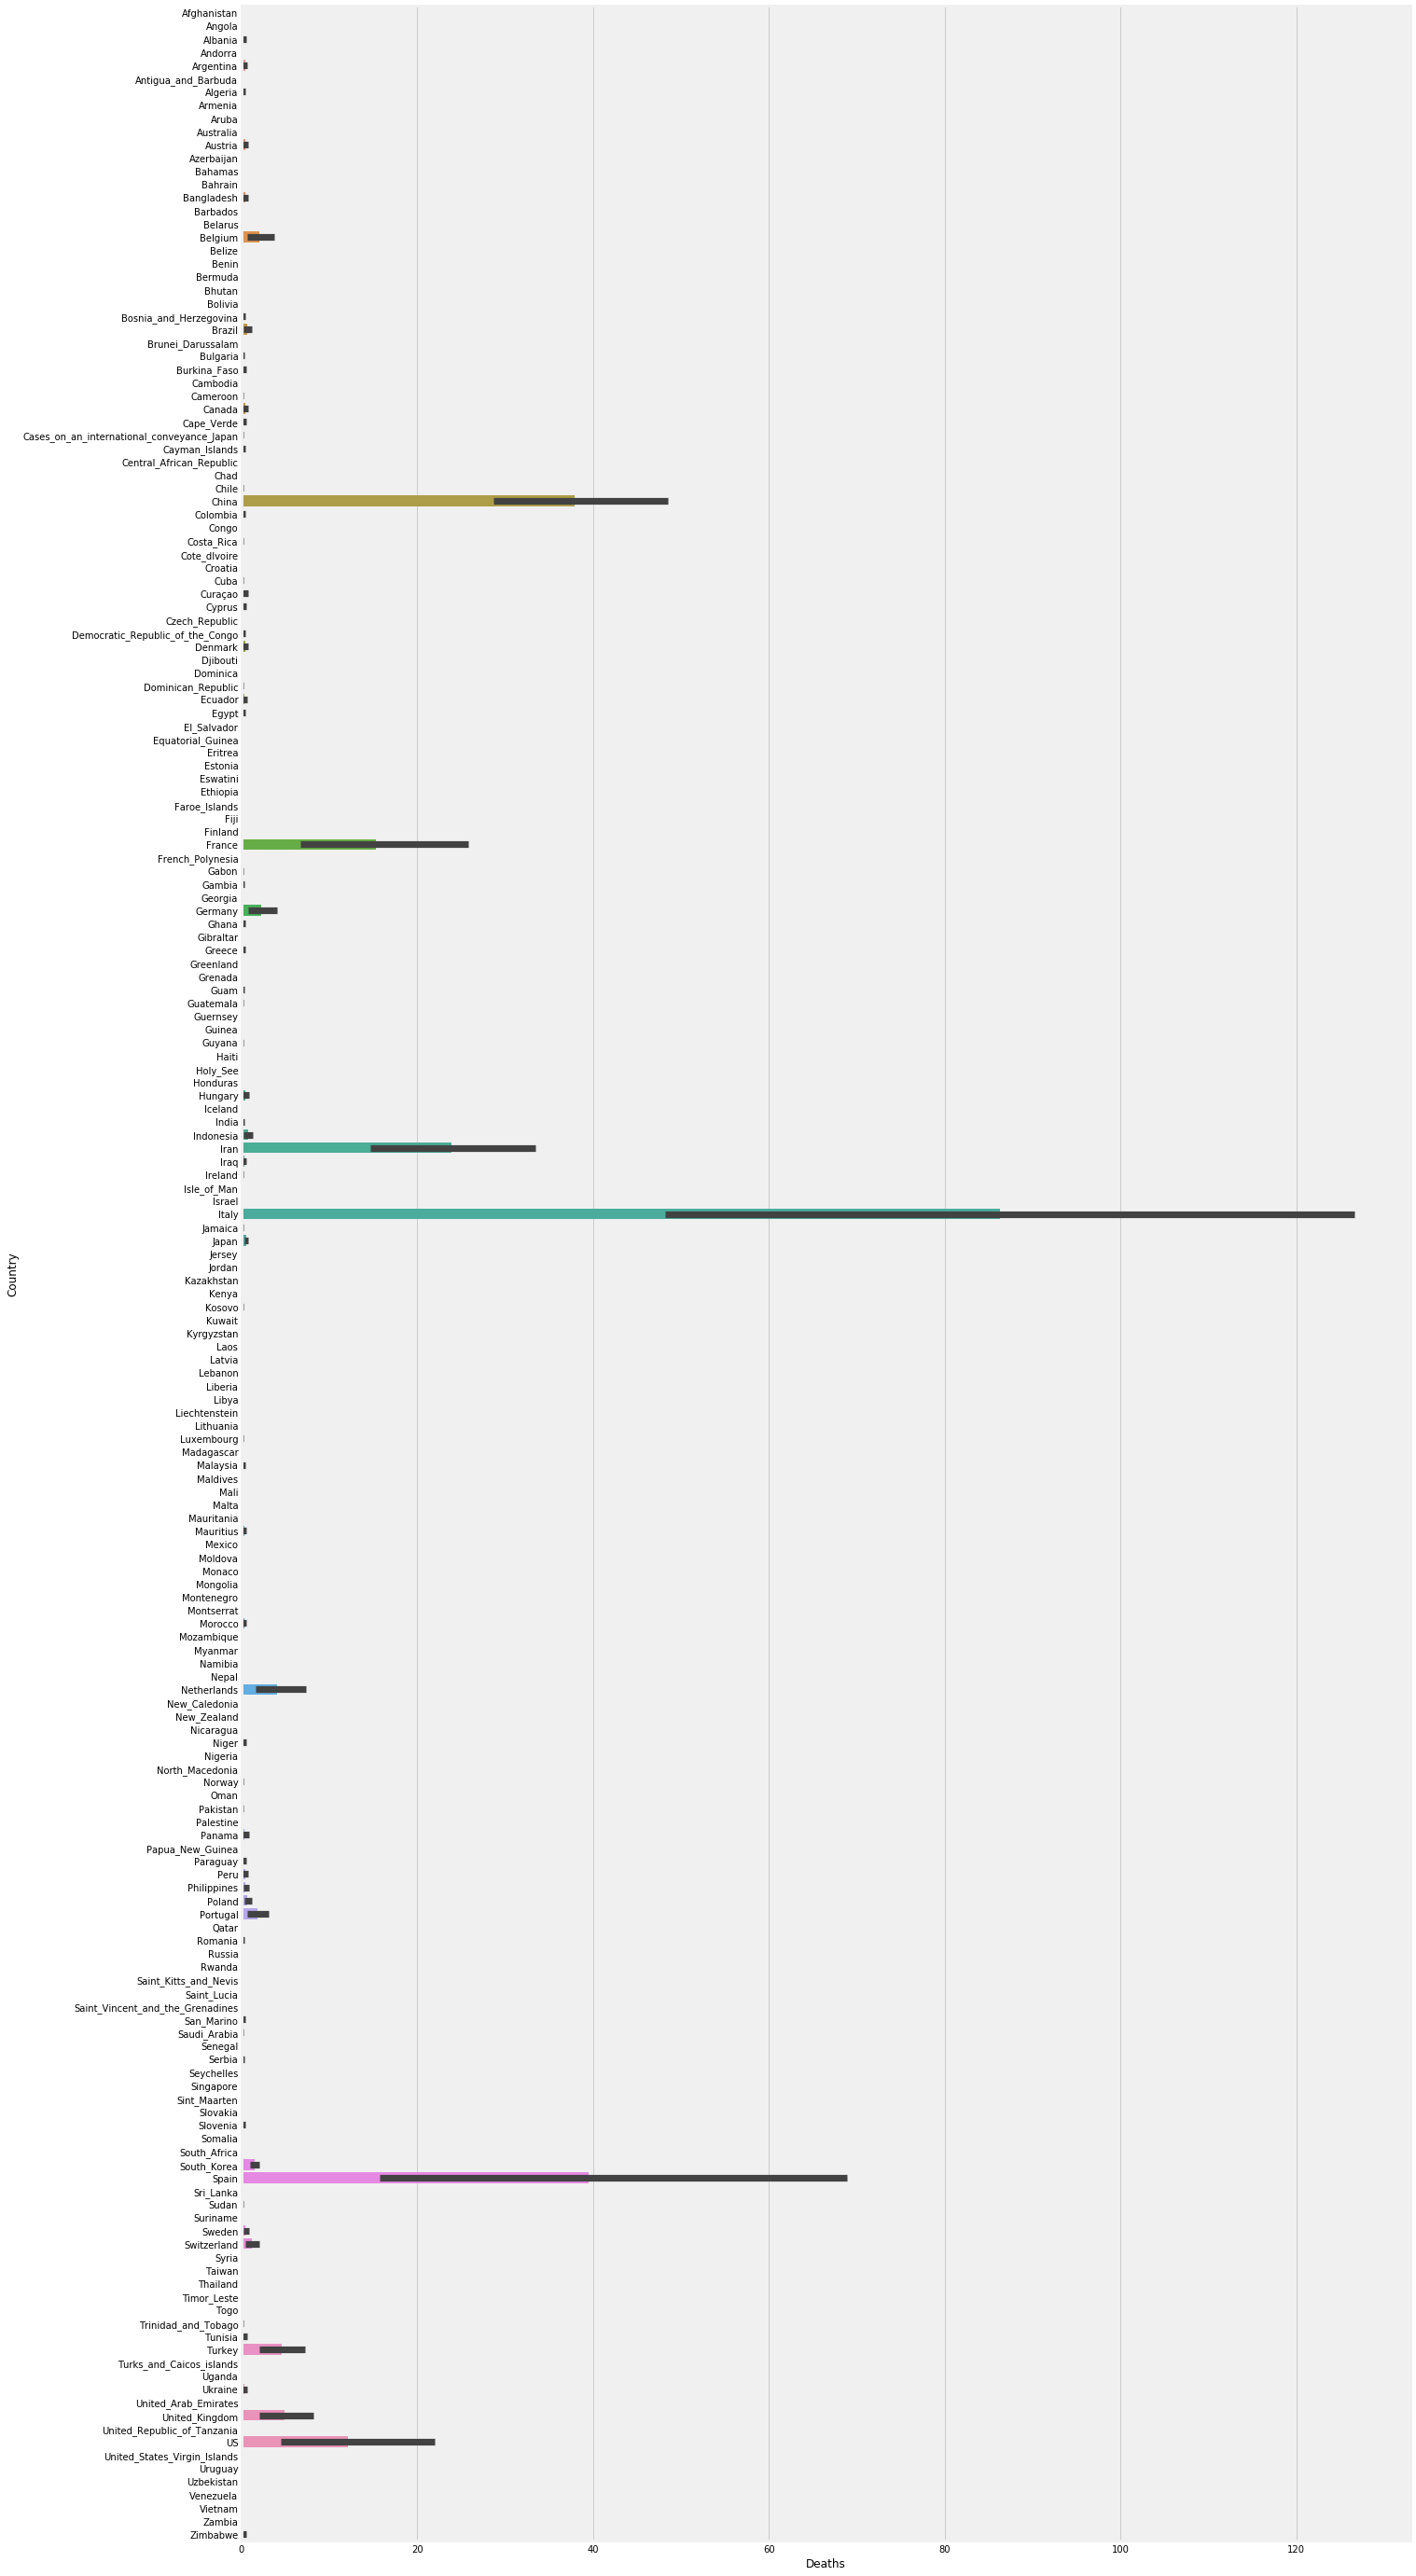

In [19]:
# Barplot of countries
plt.figure(figsize = (20,50))
sns.barplot(x="Deaths", y="Country", data=covid)

Well, that didn't work. There's too many countries and all have logarthmic death rates.  I think I'll take a look at the maximum number of deaths by country first.


In [20]:
# current date = max date
date = covid['DateRep'].max()
date

Timestamp('2020-03-26 00:00:00')

In [21]:
# Create new df by country - based on current date
# if it's the current date, then sum by country
current = covid[(covid['DateRep'] == date)]
current

,DateRep,Day,Month,Year,Cases,Deaths,Country,GeoId,Country Code,Pop_Data.2018
0,2020-03-26,26,3,2020,33,0,Afghanistan,AF,AFG,37172386.0
77,2020-03-26,26,3,2020,0,0,Angola,AO,AGO,30809762.0
82,2020-03-26,26,3,2020,23,0,Albania,AL,ALB,2866376.0
100,2020-03-26,26,3,2020,24,0,Andorra,AD,AND,77006.0
113,2020-03-26,26,3,2020,115,2,Argentina,AR,ARG,44494502.0
...,...,...,...,...,...,...,...,...,...,...
6811,2020-03-26,26,3,2020,10,0,Uzbekistan,UZ,UZB,32955400.0
6822,2020-03-26,26,3,2020,15,0,Venezuela,VE,VEN,28870195.0
6834,2020-03-26,26,3,2020,14,0,Vietnam,VN,VNM,95540395.0
6917,2020-03-26,26,3,2020,9,0,Zambia,ZM,ZMB,17351822.0


In [22]:
# Drop extra columns for deaths
deaths = current.drop(['Day', 'Month', 'Year', 'Cases', 'GeoId'], axis = 1) 

In [23]:
# sort deaths (descending)
deaths.sort_values(by=['Deaths'], inplace=True, ascending=False)

In [24]:
# deaths by top 20 countries 
deaths.head(20)

,DateRep,Deaths,Country,Country Code,Pop_Data.2018
5920,2020-03-26,738,Spain,ESP,4.672375e+07
3369,2020-03-26,685,Italy,ITA,6.043128e+07
6709,2020-03-26,249,US,USA,3.271674e+08
2261,2020-03-26,231,France,FRA,6.698724e+07
3022,2020-03-26,143,Iran,IRN,8.180027e+07
4451,2020-03-26,80,Netherlands,NLD,1.723102e+07
754,2020-03-26,56,Belgium,BEL,1.142207e+07
2462,2020-03-26,49,Germany,DEU,8.292792e+07
6192,2020-03-26,17,Switzerland,CHE,8.516543e+06
6498,2020-03-26,15,Turkey,TUR,8.231972e+07


## Visualizations of Data

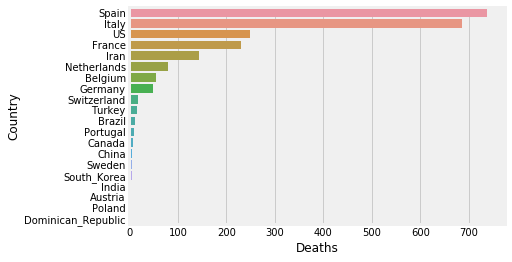

In [25]:
data=deaths.head(20)
sns.barplot(x='Deaths', y='Country', data=data)

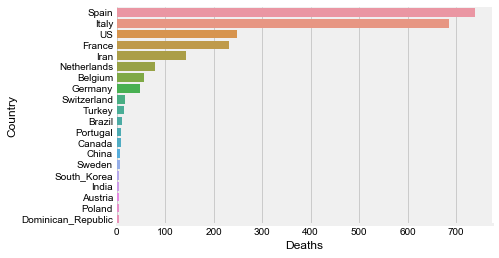

In [26]:
sns.barplot(x='Deaths', y='Country', data=data)
sns.despine(left=True)
sns.set_style('white')

# Model Construction

In [27]:
# we will need to import additional libraries in order to build our predictor model.
import time
from sklearn import ensemble
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import (TimeSeriesSplit, KFold, ShuffleSplit,
                                     StratifiedKFold, GroupShuffleSplit,
                                     GroupKFold, StratifiedShuffleSplit)

## Classification Model

We will use 10 different models in order to select the optimal one for predicting if a customer will make a purchase or not in the first 90 days after a campaign is set thru different channels, sources, mediums, etc.

In [28]:
# we will test several different models in order to select the optimal
models = {'Gradient Boosting':GradientBoostingClassifier(),
          'Adaptive Boosting':AdaBoostClassifier(),
          'Linear Discriminant Analysis':LinearDiscriminantAnalysis(),
          'Logistic Regression':LogisticRegression(solver='lbfgs', multi_class='auto'),
          'Random Forest Classifier': RandomForestClassifier(n_estimators=18),
          'K Nearest Neighbour':KNeighborsClassifier(),
          'Linear SVM': SVC(gamma='scale'),
          'Decision Tree': tree.DecisionTreeClassifier(),
          'Neural Net': MLPClassifier(alpha=1),
          'Naive Bayes': GaussianNB()}

In [29]:
# set our target value and drop it from the main df
array = new_df.values
y = np.array(pd.DataFrame(new_df['purchase_90_bin']))
y = array[:,1]
X = new_df.drop(['purchase_90_bin'],axis=1)

# build our train/test files
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# import library to help us preprocess the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

NameError: name 'new_df' is not defined

In [ ]:
# sanity check
y.shape

In [ ]:
# sanity check
y

In [ ]:
# sanity check
X.shape

In [ ]:
number_cls = len(models.keys())

def classify_models(X_train, Y_train, verbose = True):
    df_results = pd.DataFrame(data=np.zeros(shape=(number_cls,3)), columns = ['classifier', 'train_score', 'training_time'])
    count = 0
    for key, classifier in models.items():
        time_start = time.process_time()
        classifier.fit(X_train, Y_train)
        time_end = time.process_time()
        time_diff = time_end - time_start
        train_score = classifier.score(X_train, Y_train)
        df_results.loc[count,'classifier'] = key
        df_results.loc[count,'train_score'] = train_score
        df_results.loc[count,'training_time'] = time_diff
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=key, f=time_diff))
        count+=1
    return df_results

In [ ]:
df_results = classify_models(X_train, y_train)

print(df_results.sort_values(by='train_score', ascending=False))

### There seems to be overfitting in our training results, we will need to use cross validation to avoid it.

In [ ]:
# Use Cross-validation.
from sklearn.model_selection import cross_val_score

# Logistic Regression
LR = LogisticRegression(solver='lbfgs',multi_class='multinomial')

# fit LR to our data
LR.fit(X_train, y_train)
LR_scores = cross_val_score(LR, X_train, y_train, cv=3)
LR_mean = LR_scores.mean()
LR_training = LR.score(X_train, y_train)
LR_test = LR.score(X_test, y_test)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(LR.score(X_train, y_train)))

print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(LR.score(X_test, y_test)))

###########################################
print('-----------------------------------\n')

# SVC
svc = SVC(gamma='scale')

# fit LR to our data
svc.fit(X_train, y_train)
svc_scores = cross_val_score(svc, X_train, y_train, cv=3)
svc_mean = svc_scores.mean()
svc_training = svc.score(X_train, y_train)
svc_test = svc.score(X_test, y_test)

print('Accuracy of SVC classifier on training set: {:.2f}'
     .format(svc.score(X_train, y_train)))

print('Accuracy of SVC classifier on test set: {:.2f}'
     .format(svc.score(X_test, y_test)))

###########################################
print('-----------------------------------\n')

# KNearestNeighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_scores = cross_val_score(knn, X_train, y_train, cv=3)
knn_mean = knn_scores.mean()
knn_training = knn.score(X_train, y_train)
knn_test = knn.score(X_test, y_test)

print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

###########################################
print('-----------------------------------\n')

# Decision Tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_scores = cross_val_score(dt, X_train, y_train, cv=3)
dt_mean = dt_scores.mean()
dt_training = dt.score(X_train, y_train)
dt_test = dt.score(X_test, y_test)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(dt.score(X_train, y_train)))

print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(dt.score(X_test, y_test)))

###########################################
print('-----------------------------------\n')

# Gradient Boosting Classifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_scores = cross_val_score(gb, X_train, y_train, cv=3)
gb_mean = gb_scores.mean()
gb_training = gb.score(X_train, y_train)
gb_test = gb.score(X_test, y_test)

print('Accuracy of Gradient Boosting classifier on training set: {:.2f}'
     .format(gb.score(X_train, y_train)))

print('Accuracy of Gradient Boosting classifier on test set: {:.2f}'
     .format(gb.score(X_test, y_test)))

###########################################
print('-----------------------------------\n')

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=18)
rf.fit(X_train, y_train)
rf_scores = cross_val_score(rf, X_train, y_train, cv=3)
rf_mean = rf_scores.mean()
rf_training = rf.score(X_train, y_train)
rf_test = rf.score(X_test, y_test)

print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(rf.score(X_test, y_test)))

###########################################
print('-----------------------------------\n')

# NeuralNet Classifier
nn = MLPClassifier(alpha=1)
nn.fit(X_train, y_train)
nn_scores = cross_val_score(nn, X_train, y_train, cv=3)
nn_mean = nn_scores.mean()
nn_training = nn.score(X_train, y_train)
nn_test = nn.score(X_test, y_test)

print('Accuracy of NeuralNet classifier on training set: {:.2f}'
     .format(nn.score(X_train, y_train)))

print('Accuracy of NeuralNet classifier on test set: {:.2f}'
     .format(nn.score(X_test, y_test)))

###########################################
print('-----------------------------------\n')

# Naives Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_scores = cross_val_score(gnb, X_train, y_train, cv=3)
gnb_mean = gnb_scores.mean()
gnb_training = gnb.score(X_train, y_train)
gnb_test = gnb.score(X_test, y_test)

print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))

print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

###########################################
print('-----------------------------------\n')

# Adaptive Boosting
ab = AdaBoostClassifier()
ab.fit(X_train, y_train)
ab_scores = cross_val_score(ab, X_train, y_train, cv=3)
ab_mean = ab_scores.mean()
ab_training = ab.score(X_train, y_train)
ab_test = ab.score(X_test, y_test)

print('Accuracy of AdaBoost classifier on training set: {:.2f}'
     .format(ab.score(X_train, y_train)))

print('Accuracy of AdaBoost classifier on test set: {:.2f}'
     .format(ab.score(X_test, y_test)))

###########################################
print('-----------------------------------\n')

# Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda_scores = cross_val_score(lda, X_train, y_train, cv=3)
lda_mean = lda_scores.mean()
lda_training = lda.score(X_train, y_train)
lda_test = lda.score(X_test, y_test)

print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))

print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

###########################################

# Create a Dataframe with the results.
clf_df = {'Classifiers': ['Logistic Reg.', 'SVC', 'KNN', 'Dec Tree', 'Grad Boosting', 'Random Forest', 'Neural Nets', 'Naives Bayes', 'Adaptive Boosting', 'LDA'], 
    'Crossval Mean Scores': [LR_mean, svc_mean, knn_mean, dt_mean, gb_mean, rf_mean, nn_mean, gnb_mean, ab_mean, lda_mean],
         'Accuracy Training Set':[LR_training, svc_training, knn_training, dt_training, gb_training, rf_training, nn_training, gnb_training, ab_training, lda_training],
         'Accuracy Test Set':[LR_test, svc_test, knn_test, dt_test, gb_test, rf_test, nn_test, gnb_test, ab_test, lda_test]}

clf_results = pd.DataFrame(data=clf_df)



In [ ]:
clf_results = clf_results.sort_values(by=['Crossval Mean Scores'], ascending=False)
clf_results

It seems that we are still getting an overfitted result, we will need to load the original dataset and remove more dta, eiter columns or dropping NaNs since we are using the value 0 for NaN a lot.

In [ ]:
# load and read our dataset for initial exploration
df = pd.read_csv('new_df.csv', sep = ',')

# preview our data
df.head(5)

In [ ]:
# sanity check
df.shape

In [ ]:
df.isna().sum()

In [ ]:
# drop some columns
clean_df = df.drop(['created_at','birthyear','gender','orig_2','purchase_90_n'],axis=1)
clean_df.head(5)

In [ ]:
# sanity check
clean_df.shape

In [ ]:
# fill nans on channel column
clean_df['channel'].fillna(100, inplace=True)

In [ ]:
# make copy just in case
clean_df_copy = clean_df.copy()

In [ ]:
# drop NaNs
clean_df = clean_df.dropna(axis = 0, how ='any') 

In [ ]:
# sanity check
clean_df.shape

In [ ]:
clean_df.to_csv('clean_df.csv', header=True, index=False, encoding='utf-8')

In [ ]:
# let's review if we still have any NaNs
clean_df.isna().sum()

In [ ]:
# set our target value and drop it from the main df
y_ = np.array(pd.DataFrame(clean_df['purchase_90_bin']))
y_ = y_[:,0]
X_ = clean_df.drop(['purchase_90_bin'],axis=1)

# build our train/test files
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.25, random_state=42)

# import library to help us preprocess the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
y_.shape

In [ ]:
# sanity check
X_.shape

In [ ]:
# we will use the function we made in the first clf iteration
df_results_new = classify_models(X_train, y_train)

print(df_results_new.sort_values(by='train_score', ascending=False))

### Still looks a little bit overfitted, lets try with Cross Validation on this set too.

In [ ]:
# fit LR to our data
LR.fit(X_train, y_train)
LR_scores = cross_val_score(LR, X_train, y_train, cv=3)
LR_mean = LR_scores.mean()
LR_training = LR.score(X_train, y_train)
LR_test = LR.score(X_test, y_test)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(LR.score(X_train, y_train)))

print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(LR.score(X_test, y_test)))

###########################################
print('-----------------------------------\n')

# fit LR to our data
svc.fit(X_train, y_train)
svc_scores = cross_val_score(svc, X_train, y_train, cv=3)
svc_mean = svc_scores.mean()
svc_training = svc.score(X_train, y_train)
svc_test = svc.score(X_test, y_test)

print('Accuracy of SVC classifier on training set: {:.2f}'
     .format(svc.score(X_train, y_train)))

print('Accuracy of SVC classifier on test set: {:.2f}'
     .format(svc.score(X_test, y_test)))

###########################################
print('-----------------------------------\n')

# KNearestNeighbors
knn.fit(X_train, y_train)
knn_scores = cross_val_score(knn, X_train, y_train, cv=3)
knn_mean = knn_scores.mean()
knn_training = knn.score(X_train, y_train)
knn_test = knn.score(X_test, y_test)

print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

###########################################
print('-----------------------------------\n')

# Decision Tree
dt.fit(X_train, y_train)
dt_scores = cross_val_score(dt, X_train, y_train, cv=3)
dt_mean = dt_scores.mean()
dt_training = dt.score(X_train, y_train)
dt_test = dt.score(X_test, y_test)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(dt.score(X_train, y_train)))

print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(dt.score(X_test, y_test)))

###########################################
print('-----------------------------------\n')

# Gradient Boosting Classifier
gb.fit(X_train, y_train)
gb_scores = cross_val_score(gb, X_train, y_train, cv=3)
gb_mean = gb_scores.mean()
gb_training = gb.score(X_train, y_train)
gb_test = gb.score(X_test, y_test)

print('Accuracy of Gradient Boosting classifier on training set: {:.2f}'
     .format(gb.score(X_train, y_train)))

print('Accuracy of Gradient Boosting classifier on test set: {:.2f}'
     .format(gb.score(X_test, y_test)))

###########################################
print('-----------------------------------\n')

# Random Forest Classifier
rf.fit(X_train, y_train)
rf_scores = cross_val_score(rf, X_train, y_train, cv=3)
rf_mean = rf_scores.mean()
rf_training = rf.score(X_train, y_train)
rf_test = rf.score(X_test, y_test)

print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(rf.score(X_test, y_test)))

###########################################
print('-----------------------------------\n')

# NeuralNet Classifier
nn.fit(X_train, y_train)
nn_scores = cross_val_score(nn, X_train, y_train, cv=3)
nn_mean = nn_scores.mean()
nn_training = nn.score(X_train, y_train)
nn_test = nn.score(X_test, y_test)

print('Accuracy of NeuralNet classifier on training set: {:.2f}'
     .format(nn.score(X_train, y_train)))

print('Accuracy of NeuralNet classifier on test set: {:.2f}'
     .format(nn.score(X_test, y_test)))

###########################################
print('-----------------------------------\n')

# Naives Bayes
gnb.fit(X_train, y_train)
gnb_scores = cross_val_score(gnb, X_train, y_train, cv=3)
gnb_mean = gnb_scores.mean()
gnb_training = gnb.score(X_train, y_train)
gnb_test = gnb.score(X_test, y_test)

print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))

print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

###########################################
print('-----------------------------------\n')

# Adaptive Boosting
ab.fit(X_train, y_train)
ab_scores = cross_val_score(ab, X_train, y_train, cv=3)
ab_mean = ab_scores.mean()
ab_training = ab.score(X_train, y_train)
ab_test = ab.score(X_test, y_test)

print('Accuracy of AdaBoost classifier on training set: {:.2f}'
     .format(ab.score(X_train, y_train)))

print('Accuracy of AdaBoost classifier on test set: {:.2f}'
     .format(ab.score(X_test, y_test)))

###########################################
print('-----------------------------------\n')

# Linear Discriminant Analysis
lda.fit(X_train, y_train)
lda_scores = cross_val_score(lda, X_train, y_train, cv=3)
lda_mean = lda_scores.mean()
lda_training = lda.score(X_train, y_train)
lda_test = lda.score(X_test, y_test)

print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))

print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

###########################################

# Create a Dataframe with the results.
clf_df_2 = {'Classifiers': ['Logistic Reg.', 'SVC', 'KNN', 'Dec Tree', 'Grad Boosting', 'Random Forest', 'Neural Nets', 'Naives Bayes', 'Adaptive Boosting', 'LDA'], 
    'Crossval Mean Scores': [LR_mean, svc_mean, knn_mean, dt_mean, gb_mean, rf_mean, nn_mean, gnb_mean, ab_mean, lda_mean],
         'Accuracy Training Set':[LR_training, svc_training, knn_training, dt_training, gb_training, rf_training, nn_training, gnb_training, ab_training, lda_training],
         'Accuracy Test Set':[LR_test, svc_test, knn_test, dt_test, gb_test, rf_test, nn_test, gnb_test, ab_test, lda_test]}

clf_results = pd.DataFrame(data=clf_df_2)



In [ ]:
clf_results_2 = clf_results.sort_values(by=['Crossval Mean Scores'], ascending=False)
clf_results_2

In [ ]:
clean_df['purchase_90_bin'].unique()

In [ ]:
# explore how many purchase there really exist
plt.hist((clean_df.purchase_90_bin))
plt.show()

### We are just looking at accuracy and we are not looking at the whole picture, let's integrate precision, recall, AUC and F1 to our function so we can visualize it.

In [ ]:
# fit LR to our data
LR.fit(X_train, y_train)
LR_scores = cross_val_score(LR, X_train, y_train, cv=3)
LR_mean = LR_scores.mean()
LR_training = LR.score(X_train, y_train)
LR_test = LR.score(X_test, y_test)
y_hat = LR.predict(X_test)
accuracy = metrics.accuracy_score(y_test,y_hat)
precision = metrics.precision_score(y_test,y_hat,average='macro')
recall = metrics.recall_score(y_test,y_hat,average='macro')
roc_auc = roc_auc_score(y_hat,y_test)
f1_score = metrics.f1_score(y_test,y_hat,average='macro')

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(LR.score(X_train, y_train)))

print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(LR.score(X_test, y_test)))

print('Logistic regression Precision: {:.2f}'
     .format(precision))

print('Logistic regression Recall: {:.2f}'
     .format(recall))
      
print('Logistic regression AUC: {:.2f}'
      .format(roc_auc))

print('Accuracy of Logistic regression F1 Score: {:.2f}'
     .format(f1_score))

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# fit LR to our data
LR.fit(X_train, y_train)
LR_scores = cross_val_score(LR, X_train, y_train, cv=3)
LR_mean = LR_scores.mean()
LR_training = LR.score(X_train, y_train)
LR_test = LR.score(X_test, y_test)
y_hat = cross_val_predict(LR, X_train, y_train, cv=3)
lr_accuracy = accuracy_score(y_train,y_hat)
lr_precision = precision_score(y_train,y_hat,average='macro')
lr_recall = recall_score(y_train,y_hat,average='macro')
lr_roc_auc = roc_auc_score(y_hat,y_train)
lr_f1_score = f1_score(y_train,y_hat,average='macro')


print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(LR.score(X_train, y_train)))

print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(LR.score(X_test, y_test)))

print('Logistic regression Precision: {:.2f}'
     .format(lr_precision))

print('Logistic regression Recall: {:.2f}'
     .format(lr_recall))
      
print('Logistic regression AUC: {:.2f}'
      .format(lr_roc_auc))

print('Accuracy of Logistic regression F1 Score: {:.2f}'
     .format(lr_f1_score))

###########################################
print('-----------------------------------\n')

# fit LR to our data
svc.fit(X_train, y_train)
svc_scores = cross_val_score(svc, X_train, y_train, cv=3)
svc_mean = svc_scores.mean()
svc_training = svc.score(X_train, y_train)
svc_test = svc.score(X_test, y_test)
y_hat = cross_val_predict(svc, X_train, y_train, cv=3)
svc_accuracy = accuracy_score(y_train,y_hat)
svc_precision = precision_score(y_train,y_hat,average='macro')
svc_recall = recall_score(y_train,y_hat,average='macro')
svc_roc_auc = roc_auc_score(y_hat,y_train)
svc_f1_score = f1_score(y_train,y_hat,average='macro')

print('Accuracy of SVC classifier on training set: {:.2f}'
     .format(svc.score(X_train, y_train)))

print('Accuracy of SVC classifier on test set: {:.2f}'
     .format(svc.score(X_test, y_test)))

print('SVC Precision: {:.2f}'
     .format(svc_precision))

print('SVC Recall: {:.2f}'
     .format(svc_recall))
      
print('SVC AUC: {:.2f}'
      .format(svc_roc_auc))

print('SVC F1 Score: {:.2f}'
     .format(svc_f1_score))

###########################################
print('-----------------------------------\n')

# KNearestNeighbors
knn.fit(X_train, y_train)
knn_scores = cross_val_score(knn, X_train, y_train, cv=3)
knn_mean = knn_scores.mean()
knn_training = knn.score(X_train, y_train)
knn_test = knn.score(X_test, y_test)
y_hat = cross_val_predict(knn, X_train, y_train, cv=3)
knn_accuracy = accuracy_score(y_train,y_hat)
knn_precision = precision_score(y_train,y_hat,average='macro')
knn_recall = recall_score(y_train,y_hat,average='macro')
knn_roc_auc = roc_auc_score(y_hat,y_train)
knn_f1_score = f1_score(y_train,y_hat,average='macro')

print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

print('K-NN Precision: {:.2f}'
     .format(knn_precision))

print('K-NN Recall: {:.2f}'
     .format(knn_recall))
      
print('K-NN AUC: {:.2f}'
      .format(knn_roc_auc))

print('K-NN F1 Score: {:.2f}'
     .format(knn_f1_score))

###########################################
print('-----------------------------------\n')

# Decision Tree
dt.fit(X_train, y_train)
dt_scores = cross_val_score(dt, X_train, y_train, cv=3)
dt_mean = dt_scores.mean()
dt_training = dt.score(X_train, y_train)
dt_test = dt.score(X_test, y_test)
y_hat = cross_val_predict(dt, X_train, y_train, cv=3)
dt_accuracy = accuracy_score(y_train,y_hat)
dt_precision = precision_score(y_train,y_hat,average='macro')
dt_recall = recall_score(y_train,y_hat,average='macro')
dt_roc_auc = roc_auc_score(y_hat,y_train)
dt_f1_score = f1_score(y_train,y_hat,average='macro')

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(dt.score(X_train, y_train)))

print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(dt.score(X_test, y_test)))

print('Decision Tree Precision: {:.2f}'
     .format(dt_precision))

print('Decision Tree Recall: {:.2f}'
     .format(dt_recall))
      
print('Decision Tree AUC: {:.2f}'
      .format(dt_roc_auc))

print('Decision Tree F1 Score: {:.2f}'
     .format(dt_f1_score))

###########################################
print('-----------------------------------\n')

# Gradient Boosting Classifier
gb.fit(X_train, y_train)
gb_scores = cross_val_score(gb, X_train, y_train, cv=3)
gb_mean = gb_scores.mean()
gb_training = gb.score(X_train, y_train)
gb_test = gb.score(X_test, y_test)
y_hat = cross_val_predict(gb, X_train, y_train, cv=3)
gb_accuracy = accuracy_score(y_train,y_hat)
gb_precision = precision_score(y_train,y_hat,average='macro')
gb_recall = recall_score(y_train,y_hat,average='macro')
gb_roc_auc = roc_auc_score(y_hat,y_train)
gb_f1_score = f1_score(y_train,y_hat,average='macro')

print('Accuracy of Gradient Boosting classifier on training set: {:.2f}'
     .format(gb.score(X_train, y_train)))

print('Accuracy of Gradient Boosting classifier on test set: {:.2f}'
     .format(gb.score(X_test, y_test)))

print('Gradient Boosting Precision: {:.2f}'
     .format(gb_precision))

print('Gradient Boosting Recall: {:.2f}'
     .format(gb_recall))
      
print('Gradient Boosting AUC: {:.2f}'
      .format(gb_roc_auc))

print('Gradient Boosting F1 Score: {:.2f}'
     .format(gb_f1_score))

###########################################
print('-----------------------------------\n')

# Random Forest Classifier
rf.fit(X_train, y_train)
rf_scores = cross_val_score(rf, X_train, y_train, cv=3)
rf_mean = rf_scores.mean()
rf_training = rf.score(X_train, y_train)
rf_test = rf.score(X_test, y_test)
y_hat = cross_val_predict(rf, X_train, y_train, cv=3)
rf_accuracy = accuracy_score(y_train,y_hat)
rf_precision = precision_score(y_train,y_hat,average='macro')
rf_recall = recall_score(y_train,y_hat,average='macro')
rf_roc_auc = roc_auc_score(y_hat,y_train)
rf_f1_score = f1_score(y_train,y_hat,average='macro')

print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(rf.score(X_test, y_test)))

print('Random Forest Precision: {:.2f}'
     .format(rf_precision))

print('Random Forest Recall: {:.2f}'
     .format(rf_recall))
      
print('Random Forest AUC: {:.2f}'
      .format(rf_roc_auc))

print('Random Forest F1 Score: {:.2f}'
     .format(rf_f1_score))

###########################################
print('-----------------------------------\n')

# NeuralNet Classifier
nn.fit(X_train, y_train)
nn_scores = cross_val_score(nn, X_train, y_train, cv=3)
nn_mean = nn_scores.mean()
nn_training = nn.score(X_train, y_train)
nn_test = nn.score(X_test, y_test)
y_hat = cross_val_predict(nn, X_train, y_train, cv=3)
nn_accuracy = accuracy_score(y_train,y_hat)
nn_precision = precision_score(y_train,y_hat,average='macro')
nn_recall = recall_score(y_train,y_hat,average='macro')
nn_roc_auc = roc_auc_score(y_hat,y_train)
nn_f1_score = f1_score(y_train,y_hat,average='macro')

print('Accuracy of NeuralNet classifier on training set: {:.2f}'
     .format(nn.score(X_train, y_train)))

print('Accuracy of NeuralNet classifier on test set: {:.2f}'
     .format(nn.score(X_test, y_test)))

print('NeuralNet Precision: {:.2f}'
     .format(nn_precision))

print('NeuralNet Recall: {:.2f}'
     .format(nn_recall))
      
print('NeuralNet AUC: {:.2f}'
      .format(nn_roc_auc))

print('NeuralNet F1 Score: {:.2f}'
     .format(nn_f1_score))

###########################################
print('-----------------------------------\n')

# Naives Bayes
gnb.fit(X_train, y_train)
gnb_scores = cross_val_score(gnb, X_train, y_train, cv=3)
gnb_mean = gnb_scores.mean()
gnb_training = gnb.score(X_train, y_train)
gnb_test = gnb.score(X_test, y_test)
y_hat = cross_val_predict(gnb, X_train, y_train, cv=3)
gnb_accuracy = accuracy_score(y_train,y_hat)
gnb_precision = precision_score(y_train,y_hat,average='macro')
gnb_recall = recall_score(y_train,y_hat,average='macro')
gnb_roc_auc = roc_auc_score(y_hat,y_train)
gnb_f1_score = f1_score(y_train,y_hat,average='macro')

print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))

print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

print('GNB Precision: {:.2f}'
     .format(gnb_precision))

print('GNB Recall: {:.2f}'
     .format(gnb_recall))
      
print('GNB AUC: {:.2f}'
      .format(gnb_roc_auc))

print('GNB F1 Score: {:.2f}'
     .format(gnb_f1_score))

###########################################
print('-----------------------------------\n')

# Adaptive Boosting
ab.fit(X_train, y_train)
ab_scores = cross_val_score(ab, X_train, y_train, cv=3)
ab_mean = ab_scores.mean()
ab_training = ab.score(X_train, y_train)
ab_test = ab.score(X_test, y_test)
y_hat = cross_val_predict(ab, X_train, y_train, cv=3)
ab_accuracy = accuracy_score(y_train,y_hat)
ab_precision = precision_score(y_train,y_hat,average='macro')
ab_recall = recall_score(y_train,y_hat,average='macro')
ab_roc_auc = roc_auc_score(y_hat,y_train)
ab_f1_score = f1_score(y_train,y_hat,average='macro')

print('Accuracy of AdaBoost classifier on training set: {:.2f}'
     .format(ab.score(X_train, y_train)))

print('Accuracy of AdaBoost classifier on test set: {:.2f}'
     .format(ab.score(X_test, y_test)))

print('AdaBoost Precision: {:.2f}'
     .format(ab_precision))

print('AdaBoost Recall: {:.2f}'
     .format(ab_recall))
      
print('AdaBoost AUC: {:.2f}'
      .format(ab_roc_auc))

print('AdaBoost F1 Score: {:.2f}'
     .format(ab_f1_score))

###########################################
print('-----------------------------------\n')

# Linear Discriminant Analysis
lda.fit(X_train, y_train)
lda_scores = cross_val_score(lda, X_train, y_train, cv=3)
lda_mean = lda_scores.mean()
lda_training = lda.score(X_train, y_train)
lda_test = lda.score(X_test, y_test)
y_hat = cross_val_predict(lda, X_train, y_train, cv=3)
lda_accuracy = accuracy_score(y_train,y_hat)
lda_precision = precision_score(y_train,y_hat,average='macro')
lda_recall = recall_score(y_train,y_hat,average='macro')
lda_roc_auc = roc_auc_score(y_hat,y_train)
lda_f1_score = f1_score(y_train,y_hat,average='macro')

print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))

print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

print('LDA Precision: {:.2f}'
     .format(lda_precision))

print('LDA Recall: {:.2f}'
     .format(lda_recall))
      
print('LDA AUC: {:.2f}'
      .format(lda_roc_auc))

print('LDA F1 Score: {:.2f}'
     .format(lda_f1_score))

###########################################

# Create a Dataframe with the results.
clf_df_3 = {'Classifiers': ['Logistic Reg.', 'SVC', 'KNN', 'Dec Tree', 'Grad Boosting', 'Random Forest', 'Neural Nets', 'Naives Bayes', 'Adaptive Boosting', 'LDA'], 
    'Crossval Mean Scores': [LR_mean, svc_mean, knn_mean, dt_mean, gb_mean, rf_mean, nn_mean, gnb_mean, ab_mean, lda_mean],
         'Accuracy Training Set':[LR_training, svc_training, knn_training, dt_training, gb_training, rf_training, nn_training, gnb_training, ab_training, lda_training],
         'Accuracy Test Set':[LR_test, svc_test, knn_test, dt_test, gb_test, rf_test, nn_test, gnb_test, ab_test, lda_test],
           'Precision':[lr_precision,svc_precision,knn_precision,dt_precision,gb_precision,rf_precision,nn_precision,gnb_precision,ab_precision,lda_precision],
           'Recall':[lr_recall,svc_recall,knn_recall,dt_recall,gb_recall,rf_recall,nn_recall,gnb_recall,ab_recall,lda_recall],
            'AUC':[lr_roc_auc,svc_roc_auc,knn_roc_auc,dt_roc_auc,gb_roc_auc,rf_roc_auc,nn_roc_auc,gnb_roc_auc,ab_roc_auc,lda_roc_auc],
           'F1 Score':[lr_f1_score,svc_f1_score,knn_f1_score,dt_f1_score,gb_f1_score,rf_f1_score,nn_f1_score,gnb_f1_score,ab_f1_score,lda_f1_score]}

clf_results = pd.DataFrame(data=clf_df_3)

In [ ]:
# we will sort them by F1 Score
clf_results_3 = clf_results.sort_values(by=['F1 Score'], ascending=False)
clf_results_3

<img src="confusion_matrix.png">

### We will proceed with Gradiant Boosting and Random Forest for the sake of make a confussion matrix comparison

In [ ]:
# let's run Gradient Boosting again 
y_pred = cross_val_predict(gb, X_train, y_train, cv=7)

In [ ]:
print('Precision Score: ', precision_score(y_train, y_pred))
print('Recall Score: ', recall_score(y_train, y_pred))
print('F1 Score:', f1_score(y_train, y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix

con_matrix = confusion_matrix(y_train, y_pred)
f, ax = plt.subplots(figsize=(12, 8))

# plot the confusion matrix
sns.heatmap(con_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(con_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("")
ax.set_yticklabels(['Did not Made Purchase', 'Made Purchase'], fontsize=16, rotation=360)
plt.show()

In [ ]:
# let's run Random Forest again 
y_pred_lr = cross_val_predict(rf, X_train, y_train, cv=7)

In [ ]:
print('Precision Score: ', precision_score(y_train, y_pred_lr))
print('Recall Score: ', recall_score(y_train, y_pred_lr))
print('F1 Score:', f1_score(y_train, y_pred_lr))

In [ ]:
con_matrix = confusion_matrix(y_train, y_pred_lr)
f, ax = plt.subplots(figsize=(12, 8))

# plot the confusion matrix
sns.heatmap(con_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(con_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("")
ax.set_yticklabels(['Did not Made Purchase', 'Made Purchase'], fontsize=16, rotation=360)
plt.show()

In [ ]:
y_scores = cross_val_predict(rf, X_train, y_train, cv=7, method="predict_proba")

In [ ]:
# sanity check
y_scores.shape

In [ ]:
y_scores = y_scores[:, 1]

In [ ]:
# sanity check
y_scores.shape

In [ ]:
# How can we decide which threshold to use? 
# We want to return the scores instead of predictions with this code.
from sklearn.metrics import precision_recall_curve

precisions, recalls, threshold = precision_recall_curve(y_train, y_scores)

In [ ]:
def precision_recall_curve(precisions, recalls, thresholds):
    fig, ax = plt.subplots(figsize=(12,8))
    plt.plot(thresholds, precisions[:-1], "r--", label="Precisions")
    plt.plot(thresholds, recalls[:-1], "#424242", label="Recalls")
    plt.title("Precision and Recall \n Tradeoff", fontsize=18)
    plt.ylabel("Level of Precision and Recall", fontsize=16)
    plt.xlabel("Thresholds", fontsize=16)
    plt.legend(loc="best", fontsize=14)
    plt.xlim([0, 1])
    plt.ylim([0, 1.25])
    plt.axvline(x=0.43, linewidth=3, color="#0B3861")
    
    
precision_recall_curve(precisions, recalls, threshold)
plt.show()